# 対数関数

**対数関数** というのはlogのことです。logの有効活用の例から紹介しましょう。

logはよく「エントロピー」を求めるのに使われます。エントロピーとは各分野によって若干意味が変わりますが、ここでは「複雑さ」という意味で使います。
エントロピーの値が高ければ高いほど複雑になります。実際にパスワードの複雑さをエントロピーで計ってみましょう。

エントロピーの定義もたくさんありますが、ここでは
$$E(x) = \log_{10}{x}$$
として定義します。（logの意味は後ほど紹介します）

In [5]:
# 半角英数（62パターン）の各文字数ごとのエントロピー

for len=1:8
    println(len, "文字のパスワードのエントロピーは ", log10(62^len))
end

1文字のパスワードのエントロピーは 1.792391689498254
2文字のパスワードのエントロピーは 3.584783378996508
3文字のパスワードのエントロピーは 5.377175068494761
4文字のパスワードのエントロピーは 7.169566757993016
5文字のパスワードのエントロピーは 8.96195844749127
6文字のパスワードのエントロピーは 10.754350136989522
7文字のパスワードのエントロピーは 12.546741826487777
8文字のパスワードのエントロピーは 14.339133515986031


$62^{文字数}$ は、パスワードのパターン数を求めています。これにより、パスワードの複雑さを数値化できます。

さて、logを改めて紹介します。

# 定義: 対数log

$a = b^c$とするとき、対数$\log$を

$$c = \log_{b} a$$

と定義する。

「aはbのc乗」のcを表すのにlogを使っています。少しややこしいですが、

$$
\begin{aligned}
x &= y + z\\
x - z &= y
\end{aligned}
$$

と変形できるように
$$
\begin{aligned}
a &= b^c\\
c &= \log_{b} a\\
\end{aligned}
$$

のように変形できる、ということです。
ですが、機械学習ではおおよそこの意味でlogを使うことはないでしょう。
$c = \log_b a$ のbを　**底**と呼びますが、機械学習に限らず学術分野では底は$2,10,e$とすることがほとんどです。

2は２進数で考える時に使われ、10は10進数で考えるときに使います。

2はコンピュータなどの工学系でよく使われます。底が2とするlogを**２進対数**といいます。

10は化学や物理などの実験で欲使われます。底が1とするlogを**常用対数**といいます。

$e$は**ネイピア数**と呼ばれる数で、$2.718\dots$ではじまる$\pi$のように無限に続く小数です。数学でlogを扱うときはほとんど$e$を底として使います。
$e$を底とする対数を**自然対数**と呼び、自然対数のlogをlnと表記することもあります(nature（自然）のn)。

各底が明らかな場合は、底を省略して

$$ \log_b a = \log a$$

のように表記することもあります。以降では注意がない場合、底を$e$とします（ネイピア数がなんなのか紹介していないのにごめんなさい）。

logには三角関数と同様に様々な性質がありますが、すべてを紹介することはしません。
機械学習を使う上での最低限の3つの計算の性質と、機械学習で最も使われる性質を1つ紹介します。


## 計算に関する3つ性質

### logのたし算、引き算

logは同じ底を持つとき、次の性質があります。

$$
\begin{aligned}
\log_a X + \log_a Y &= \log_a XY\\
\log_a X - \log_a Y &= \log_a \frac{X}{Y}
\end{aligned}
$$


雰囲気を説明をすると、まだみなれないかもしれませんが「Xはaの$log_a X$乗」「Yはaの$log_a Y$乗」と言い換えられます（もしわかりづらい場合は上の定義を見返してみてください）。

そして$a^m * a^n = a^{(m+n)}$という性質があります。元の数同士のかけ算$a^m \times a^n$は累乗のたし算$a^(m+n)$と考えることができるわけです。

上の式における元の数同士のかけ算は$XY$、累乗のたし算は$\log_{a} X + log_{b} Y$となるわけです。明確な証明ではありません。


In [8]:
a = log(10)
b = log(20)
println("log(10)+log(20)=", a+b)

c = log(10*20)
println("log(10*20)=", a+b)



log(10)+log(20)=5.298317366548037
log(10*20)=5.298317366548037


### 累乗のlog

累乗 $a^n$ のlogをとると

$$ \log a^n = n \log a $$

となります。これは、上のlogのたし算を使うと

$$
\begin{aligned}
log a^n &= \log a \times a \times a \times a \times \dots \times a\quad(aをn回かけている)\\
        &= \log a + \log a + \log a + \dots + \log a \quad (\log a をn回足している)\\
        &= n \log a
\end{aligned}
$$

とできます。少し応用な考え方ですね。　総和の記号である $\sum$ と　　相乗　$\prod$ を使うと次のようにも表現できます。

$$
\begin{aligned}
log a^n &= \log \prod_{i=1}^{n} a\\
        &= \sum_{i=1}^{n} \log a\\
        &= n \log a
\end{aligned}
$$

Juliaで試したところ、logの丸め誤差で少々ずれました。


In [12]:
println("log 3^10=", log(3^10) )
println("10 log 3=", 10 * log(3) )

log 3^10=10.986122886681096
10 log 3=10.986122886681098


## 最も重要な性質

logを追加上で最も重要な性質があります。次のプログラムで確認すると非常に分かりやすいです。

In [19]:
using Printf


f = x -> 10^x

for x=0:10
    @printf("f(x) = %12d, log f(x) = %10f\n", f(x), log(f(x)))
end




f(x) =            1, log f(x) =   0.000000
f(x) =           10, log f(x) =   2.302585
f(x) =          100, log f(x) =   4.605170
f(x) =         1000, log f(x) =   6.907755
f(x) =        10000, log f(x) =   9.210340
f(x) =       100000, log f(x) =  11.512925
f(x) =      1000000, log f(x) =  13.815511
f(x) =     10000000, log f(x) =  16.118096
f(x) =    100000000, log f(x) =  18.420681
f(x) =   1000000000, log f(x) =  20.723266
f(x) =  10000000000, log f(x) =  23.025851


これは指数関数$f(x)=10^x$の各$x$における各$f(x)$と$\log f(x)$を表示しています。指数関数ですので$f(x)$の値は急激に増えますが、$\log f(x)$は値自体が小さく上昇も緩やかです。
しかし、＄f(x)＄と$\log f(x)$には共通点があります。それは両者ともに「xが増えればどちらも値が大きくなっている」とう点です。この性質を**単調増加**といいます。

言い換えると、「$f(x)$はlogをとっても順序を変えない」といえます。機械学習では膨大に大きい値となってしまい、「冷静に」値を見られなくなってしまう場合はあります。
先ほどの$f(x) = x^n$を可視化してみましょう。



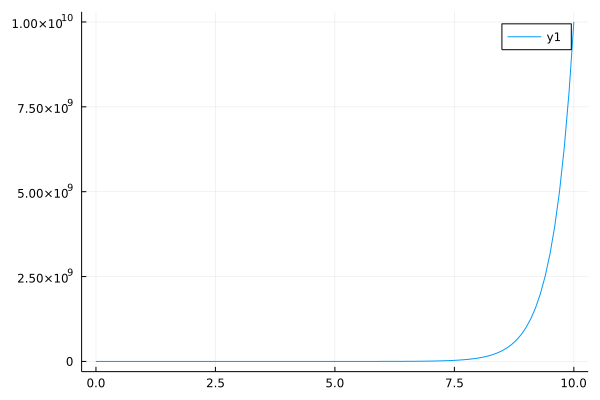

In [38]:
using Plots

plot(0:0.1:10, f)

これでは$x$が大きくなると急激に上昇してしまい、$x$が小さい部分についての比較が非常に困難です。次に$\log f(x)$を可視化してみます。

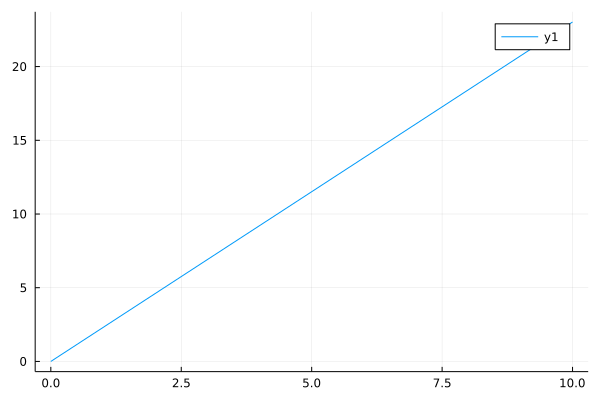

In [37]:
using Plots

log_f = x -> log(f(x))

plot(0:0.1:10, log_f)

増加傾向は変わらずに緩やかに上昇しているため、$x$が小さいときの値でも比較しやすそうです。

このように、実際の数ではなく「どういった傾向か」を知りたいときに対数は使われます。

また、これまでは不自然にも$l\og x$の$x > 0$ の部分しか見ていませんでしたが、実は$\log x$は0に近づくと$- \infty$に発散します。（おまけのエントロピーの解説のグラフをみれば雰囲気はわかります。）

更に、$\log x$は$x < 0$の範囲では「多価関数」と呼ばれる特別な関数となってしまいます。

そもそも「関数」という言葉を何も説明な区使ってきましたが、数学における関数とは「ある値$x$が定まったときに、$y=f(x)$と対応する関係を表すもの」としています。
要するに$x$ と$y$を対応づける「紐」のようなものです。

これに対して多価関数とは「ある$x$が定まったときに、複数の$y_n = f(x) \quad(n=1, 2, \dots)$のように複数の値が対応できる関係を表すもの」としています。
多価関数は非常に厄介な存在のため、一般的に$\log x$を考えるときは$x$の領域を$0 < x < \infty$としています。

このように、関数の変数の範囲のことをその関数の**定義域**といいます。ついでに紹介すると、その定義域に対応する$f(x)$の領域を**値域**といいます。
$f(x) = \log x$における定義域は$(0, \infty)$(0より大きく$\infty$未満)で、値域は$(-\infty, \infty)$($-\infty$より大きく$\infty$未満)です。



## おまけ: エントロピー

機械学習というよりも情報理論全般でエントロピーがよく出て来ます。エントロピーを知ることで上述の通り「複雑さ」を計ることができるわけです。
情報理論ではエントロピーを「情報量」という呼び方をします。どれほどの情報が含まれているか、をみるわけです。
そのなかでも最もシンプルな**自己情報量**を紹介します。

確率、というのは0%から100%まで、数値としては0から1までの値で推移します。これをそのまま、冒頭で定義したエントロピーに適用するとどうなるでしょうか。

In [39]:
for p in 0:0.1:1
    println("確率",p,"のエントロピーは",log(p),"である。")
end

確率0.0のエントロピーは-Infである。
確率0.1のエントロピーは-2.3025850929940455である。
確率0.2のエントロピーは-1.6094379124341003である。
確率0.3のエントロピーは-1.2039728043259361である。
確率0.4のエントロピーは-0.916290731874155である。
確率0.5のエントロピーは-0.6931471805599453である。
確率0.6のエントロピーは-0.5108256237659907である。
確率0.7のエントロピーは-0.35667494393873245である。
確率0.8のエントロピーは-0.2231435513142097である。
確率0.9のエントロピーは-0.10536051565782628である。
確率1.0のエントロピーは0.0である。


0.0のときは$\infty$で、$1.0$未満のエントロピーはマイナスとなってしまいました。こうなるのにはlogのグラフをみるとわかります。

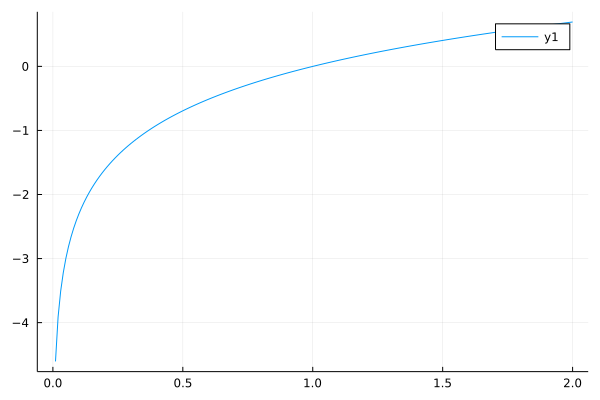

In [46]:
using Plots

plot(0:0.01:2, log)

logは底に限らず、$x=1$のときには$0$になります。これは$1 = a^0$が$0 = \log a$だからです。また、1未満のときは負の値をとり、0に近づくと$- \infty$に近づきます。

ここで、確率は「0から1の間で推移する」という性質を利用します。つまりxは$0 \lte x \lte 1$です。logをとると常に0以下となりますが、負の数だけで考えるのは扱いづらいため、
自己情報量を次のように定義しました。

#### 定義: 自己情報量

確率を$p$とするときの自己情報量$I(p)$を

$$I(p) = - \log_a p \quad(ただしa>1とする)$$

とする。
すると次のようなグラフで考えられます。

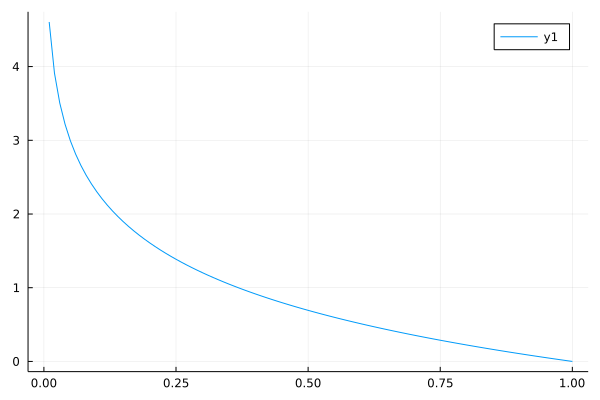

In [55]:
using Plots

I = x -> - log(x)

plot(0:0.01:1, I)

これでエントロピーが考えやすくなりました。さて、突然出て来た底$a$とは何を意味するでしょうか？

aには1より大きい様々な値を入れられますが、情報理論ではおおよそ2を使います。
底を2とする自己情報量を**bit**と呼びます。例えば確率$p=\frac{1}{2}$の自己情報量を求めると


$$
\begin{aligned}
I(\frac{1}{2}) &= - log_{2} \frac{1}{2}\\
               &= - log_{2} 2^{-1}\\
               &= - (- \log_2 2)\\
               &= - (- 1)\\
               &= 1
\end{aligned}
$$

In [57]:
println("log_2 1/2 = ", -log2(1/2))

log_2 1/2 = 1.0


です。これは1桁の２進数のいわゆる「ビット数」と一致します。このように定義するととても分かりやすくスムーズに扱うことができます。

更に、**平均情報量**という考え方があります。これは自己情報量の平均をとったものです。
さきほどの例でいえば、2進数の場合は0か1かです。そしてそれらを選択するのは$\frac{1}{2}$と考えることができるため、

$$
\begin{aligned}
(\frac{1}{2} \times - \log_2 \frac{1}{2} + \frac{1}{2} \times - \log_2 \frac{1}{2})  &= \frac{1}{2} \times 1 + \frac{1}{2} \times 1\\
               &= \frac{1}{2}　+ \frac{1}{2}\\
               &= 1
\end{aligned}
$$

In [63]:
println("(1/2) * -log_2 1/2  + 1/2 * - log_2 1/2 = ", (1/2) * - log2(1/2)  + (1/2) * - log2(1/2))

(1/2) * -log_2 1/2  + 1/2 * - log_2 1/2 = 1.0


という平均を考えられます。「平均」と言う言葉に違和感を持つかもしれませんが、いくつかのものの平均（算術平均、相加平均）は足し合わせたものをその個数分で割ります。
つまり、

$$a \frac{a+b}{2} = \frac(1){2} a + \frac{1}{2} b $$

と、先ほどの式と同じような形になりました。きちんと平均情報量を定義してみましょう。

#### 定義: 平均情報量

事象（2進数の場合、0を選ぶか1を選ぶかのようなこと）を$A_1, A_2, A_3, \dots, A_n$が相反する（0と1を同時に選ぶようなことはない、ということ）とする。
このときの各確率を$p_1, p_2,  p_3, \dots, p_n$(ただし、$\sim_{i=1}^{n} p_i = 1$)とするとき、平均情報$\bar{I}$を

$$\bar{I} = \sum_{i=1}^{n} p_i \log_2 p_i $$

とする。


実際にJuliaで計算してみましょう。

In [67]:
P = [0.1, 0.3, 0.4, 0.2]
println("確率の合計は", sum(P))

I = 0.0
for p=P
    I += p * - log2(p)
end

println("Pの平均情報量は", I)

確率の合計は1.0
Pの平均情報量は1.8464393446710154


実は、情報理論ではこの平均情報量を**エントロピー**として定義しています。紹介していない言葉もありますが、一応明記します。

#### 定義: （情報理論における）エントロピー

確率変数（おおよそ事象のこと）がとる値（サイコロの出目のような数）を$x_1, x_2, x_3, \dots, x_n$とする。
また各$x_i$が起こる確率を$p_i$(ただし $\sum_{i=1}^n pi = 1$ である)とするとき、**（情報理論における）エントロピー** $H(X)$を

$$H(X) = \sum_{i=1}^{n} p_i \times -log_2 p_i $$

とする。


# _**以下については、本当に余裕のあるときに見てください。**_



いままでの事象は「２進数」「サイコロ」のような、起こる事象が「明確に個数を持った」ものの確率を見てきました。

「明確に個数を持った」というのは数学では「自然数で表せる」といいます。そして自然数は**離散**というものに区分されます。

しかし、機械学習では「確率モデル」と言うものを扱います。確率モデルは基本的に「連続」を前提に考えることが多いです。連続は離散に対比する言葉です。
連続の場合はn個というように表せません。そのため、うえで定義したようなエントロピーの表現ができません。

<img src="./images/08/01.png" alt="Drawing" style="width: 500px;"/>

　　　　　　　　　　　　　　                                        

しかし、同じようにエントロピーを考えられます。私たちは区分求積法を使って積分を考えました。このときに$n$個を無限に近づけることで、長方形の面積からある範囲の図形の面積を求めました。
実はこれをそのまま転用できるのです。

「（情報理論における）エントロピー」を少しずつ変えてみます。

> 確率変数（おおよそ事象のこと）がとる値（サイコロの出目のような数）を$x_1, x_2, x_3, \dots, x_n$とする。

これは連続の場合n個と表せないため、「$X$という範囲で起こる」と考えます。

> また各$x_i$が起こる

$X$は連続のため、$X$の範囲の要素は無数にあります。そのため、各確率変数$x \in X$($X$の範囲のある要素$x$)と表現します。

> 確率を$p_i$

xが無数にある以上、$p_i$のように番号での表記はできません。そのため、$x$２対応する確率という意味で $p_x \in [0, 1]$（0以上1以下の数値）とします。

> (ただし $\sum_{i=1}^n pi = 1$ である)$

$x$が無数にあるため$p$も無数にあります。そのため和は積分で表します。

$$ \int_{x \in X} p_x = 1$$

> $$H(X) = \sum_{i=1}^{n} p_i \times -log_2 p_i $$

こちらも積分で書き直します。

$$ H(X) = \int_{x \in X} p_x \times - log_2 p_x $$

すると次のようになります。


#### 定義: （情報理論における）エントロピー（連続の場合）

確率変数がとる値全体を$X$とする。
また各$x \in X$が起こる確率を$p_x$(ただし $\int_{x \in X} p_x = 1$ である)とするとき、**（情報理論における）エントロピー** $H(X)$を

$$H(X) = \sum_{x \in X} p_x \times -log_2 p_x $$

とする。


非常に難解ですが、一つ一つをみていくと「意味」はわかるようになるはずです。